# Runge-Kutta, grado 5

### Paquetes y whatnot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Función Runge-Kutta, grado 5 

In [2]:
def RK5(x0,y0,h,xmax,f,*args):
    x,y = (x0,y0)
    X,Y = ([x],[y])
    while x<=xmax:
        k1 = f(x,y,*args)
        k2 = f(x+h/4, y+k1*h/4,*args)
        k3 = f(x+h/4, y+k1*h/8+k2*h/8,*args)
        k4 = f(x+h/2, y-k2*h/2+k3*h,*args)
        k5 = f(x+h*3/4, y+k1*h*3/16+k4*h*9/16,*args)
        k6 = f(x+h, y-k1*h*3/7+k2*h*2/7+k3*h*12/7-k4*h*12/7+k5*h*8/7,*args)

        y += h*(7*k1+32*k3+12*k4+32*k5+7*k6)/90
        x+=h
        
        X.append(x)
        Y.append(y)
    return X,Y

### Punto 1
Definamos nuestras funciones y apliquemos RK5:

In [3]:
def fun1(x,y):
    return x-2*y

x1,y1 = RK5(0,1,0.01,5,fun1)

xl = np.linspace(0,5,5000)

def ref1(x):
    return (2*x+5*np.e**(-2*x)-1)/4


Graficando:

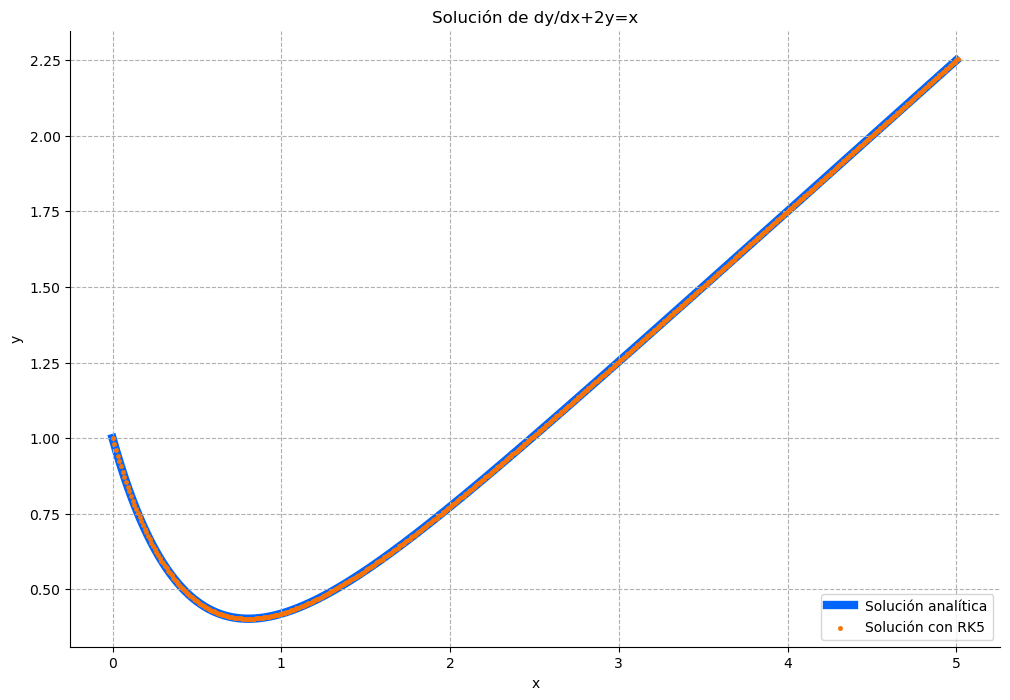

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,8))

ax1.scatter(x1,y1, marker='.', color='xkcd:orange', linewidth=0.5, zorder=2, label='Solución con RK5')
ax1.plot(xl,ref1(xl), color='xkcd:bright blue', linewidth=6, zorder=1, label='Solución analítica')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='--', zorder=0)
ax1.set_title("Solución de dy/dx+2y=x")
ax1.set_ylabel("y")
ax1.set_xlabel("x")
ax1.legend(loc='lower right')

### Punto 2
Calculemos las soluciones en todos los casos:

In [5]:
def fun2(x,y,a):
    return x**2-2*y**a

X,Y = ([],[])
for a in [0.2,0.4,0.6,0.8]:
    x,y = RK5(0,1,0.01,5,fun2,a)
    X.append(x)
    Y.append(y)

Graficando:

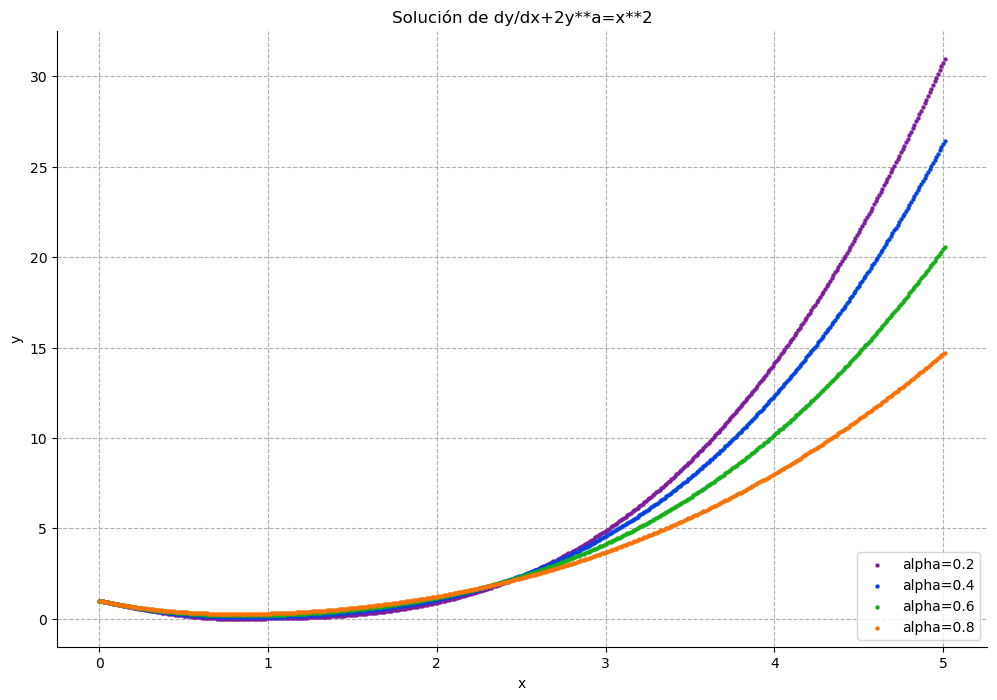

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,8))

for x,y,color,alpha in zip(X,Y,['purple','blue','green','orange'],['0.2','0.4','0.6','0.8']):
    ax1.scatter(x,y, marker='.', color=f'xkcd:{color}', linewidth=0.1, zorder=2, label=f'alpha={alpha}')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='--', zorder=0)
ax1.set_title("Solución de dy/dx+2y**a=x**2")
ax1.set_ylabel("y")
ax1.set_xlabel("x")
ax1.legend(loc='lower right')